In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/messy_beer_servings.csv")

In [6]:
df = data.copy()

In [7]:
df.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [5]:
df.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [7]:
df.shape

(193, 7)

In [8]:
df.drop("Unnamed: 0",axis = 1 , inplace = True)

In [9]:
df.shape

(193, 6)

In [10]:
df.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [11]:
col = ['beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol']
column = df[col]

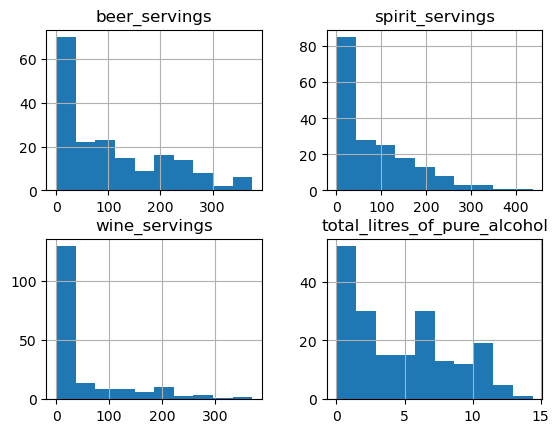

In [12]:
column.hist()
plt.show()

In [ ]:
for i in col:
    df[i] = df[i].fillna(df[i].median())

In [14]:
df.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

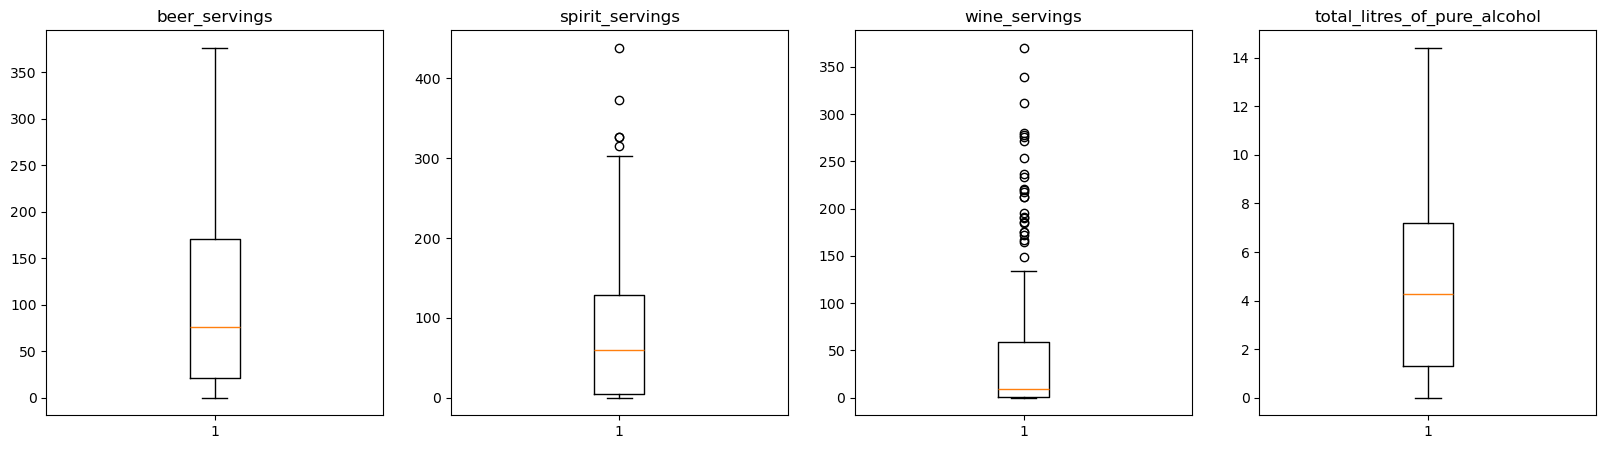

In [15]:
fig,axs = plt.subplots(1,4,figsize = (20,5))
titles = ['beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol']

for i in range(4):
    axs[i].boxplot(df[col[i]])
    axs[i].set_title(titles[i])
plt.show()

In [19]:
q1 = np.percentile(df["spirit_servings"],25,method = "midpoint")
q3 = np.percentile(df["spirit_servings"],75,method = "midpoint")

iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

outlier = []

for i in df["spirit_servings"]:
    if ((i > upper ) or (i < lower)):
        outlier.append(i)
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [25]:
re = df["spirit_servings"] > upper
index = df.loc[re]
index.index

Index([15, 68, 73, 141, 144], dtype='int64')

In [26]:
df.drop([15, 68, 73, 141, 144] , inplace = True)

In [27]:
outlier = []

for i in df["spirit_servings"]:
    if ((i > upper ) or (i < lower)):
        outlier.append(i)
outlier

[]

In [35]:
df.reset_index()

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
183,188,Venezuela,76.0,100.0,3.0,7.7,South America
184,189,Vietnam,111.0,2.0,1.0,2.0,Asia
185,190,Yemen,6.0,0.0,0.0,0.1,Asia
186,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [62]:
q1 = np.percentile(df["wine_servings"],25,method = "midpoint")
q3 = np.percentile(df["wine_servings"],75,method = "midpoint")

iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

outlier = df[(df["wine_servings"] > upper) | (df["wine_servings"] < lower)]["wine_servings"].tolist()

rem = df[(df["wine_servings"] > upper) | (df["wine_servings"] < lower)]
rem.index

Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,  75,
        81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
      dtype='int64')

In [63]:
df.drop([3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,  75,
        81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185] , inplace = True)

In [69]:
df.reset_index(drop = True, inplace = True)

In [73]:
outlier = df[(df["wine_servings"] > upper) | (df["wine_servings"] < lower)]["wine_servings"].tolist()
outlier

[]

In [75]:
df.to_csv("outliers_removed.csv",index = False)